In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [2]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]  

In [3]:
rc('animation', html='html5')

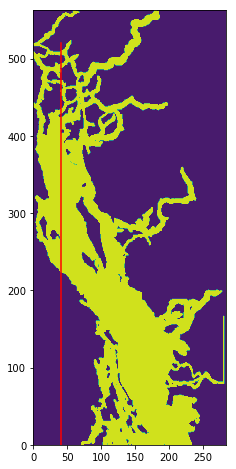

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
plt.contourf(new_domain[0,:,:])
viz_tools.set_aspect(ax)
ax.plot((40,40), (0,520), 'r-')

In [24]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def animatedensity2(file1, file2, xslice, xlims, ylims, mesh_mask):
    pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(564),
                                        (np.ones([564,40]) *np.expand_dims(file1.variables['nav_lat_grid_T'][:, xslice][:],1)).T])
    pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(564),
                                        (np.ones([564,40]) *np.expand_dims(file2.variables['nav_lat_grid_T'][:, xslice][:],1)).T])
    fig,ax = plt.subplots(1,2,figsize=(8,8))
    deptht = file1.variables['deptht'][:]
    xslicemask = 1 - mesh_mask[:,:, xslice]
    def animate30(i):
        ax[0].clear()
        ax[1].clear()
        density1 = calc_rho(file1.variables['vosaline'][i,:,:, xslice],
                                        file1.variables['votemper'][i,:,:, xslice],
                                        pressure1)
        density2 = calc_rho(file2.variables['vosaline'][i,:,:, xslice],
                                        file2.variables['votemper'][i,:,:, xslice],
                                        pressure2)
        masked_density1 = ma.masked_array(density1, mask = xslicemask)
        masked_density2 = ma.masked_array(density2, mask = xslicemask)
        ax[0].pcolormesh(np.arange(0,564), deptht, masked_density1, 
                         vmin = 1021.8,vmax = 1024.5, cmap = 'bwr' )
        ax[1].pcolormesh(np.arange(0,564), deptht, masked_density2, 
                         vmin = 1021.8,vmax = 1024.5, cmap = 'bwr' )
        ax[0].contour(np.arange(0,564), deptht, masked_density1,
                      levels=[1023.3], colors='black')
        ax[1].contour(np.arange(0,564), deptht, masked_density2,
                      levels=[1023.3], colors='black')
        ax[0].set_ylim(ylims)
        ax[0].set_xlim(xlims)
        ax[0].set_title('X = ' + str(xslice) + ', hour = %03d'%(i)) 
        ax[1].set_ylim(ylims)
        ax[1].set_xlim(xlims)
        ax[1].set_title('X = ' + str(xslice) + ', hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=102,interval=interval*1e+3, repeat=False)
    return ani40

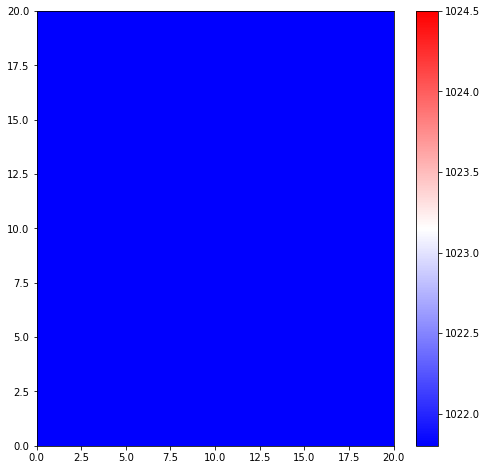

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
ones = ax.pcolormesh(np.ones((20,20)), 
                      vmin = 1021.8, vmax =1024.5, cmap = 'bwr')
fig.colorbar(ones, ax=ax)

In [9]:
S240 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24-0/SalishSea_1h_20160601_20160605_grid_T.nc')
S2402 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24-02/SalishSea_1h_20160601_20160605_grid_T.nc')

## Wind event
* pre winds: 6 hours
* ramp up: 24 hours
* steady: 24 hours
* ramp down: 24 hours
* post winds: 24 hours

## varying v winds from north, 0 - 0.4 on left, 0.2 - 0.4 on right, summer stratification

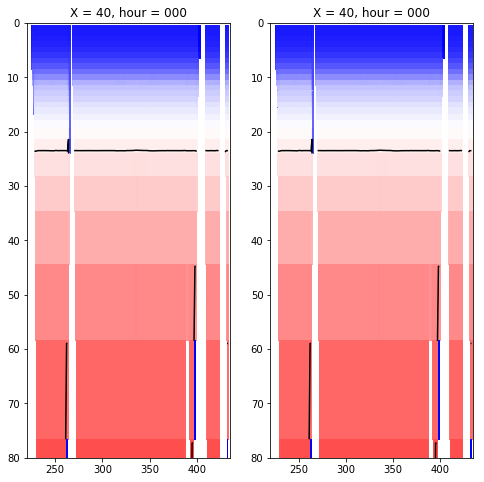

In [31]:
animatedensity2(S240, S2402, 40, (220,435), (80,0), new_domain)

In [26]:
S480 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48-0/SalishSea_1h_20160601_20160605_grid_T.nc')
S4802 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48-02/SalishSea_1h_20160601_20160605_grid_T.nc')

## Wind event
* pre winds: 6 hours
* ramp up: 12 hours
* steady: 48 hours
* ramp down: 12 hours
* post winds: 24 hours

## varying v winds from north, 0 - 0.4 on left, 0.2 - 0.4 on right, summer stratification

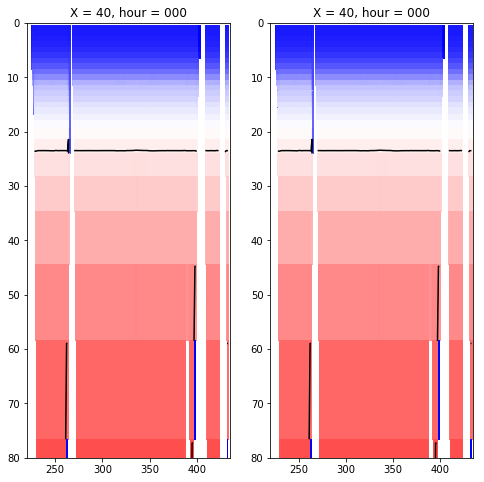

In [32]:
animatedensity2(S480, S4802, 40, (220,435), (80,0), new_domain)

In [28]:
S700 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/70-0/SalishSea_1h_20160601_20160605_grid_T.nc')
S7002 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/70-02/SalishSea_1h_20160601_20160605_grid_T.nc')

## Wind event
* pre winds: 6 hours
* ramp up: 1 timestep (40 sec) 
* steady: 72 hours
* ramp down: 1 timestep (40 sec)
* post winds: 24 hours

## varying v winds from north, 0 - 0.4 on left, 0.2 - 0.4 on right, summer stratification

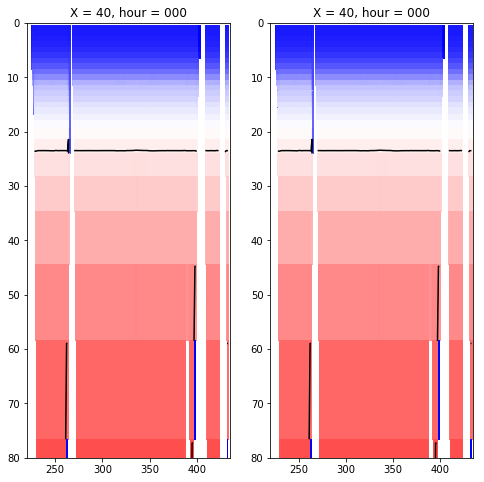

In [33]:
animatedensity2(S700, S7002, 40, (220,435), (80,0), new_domain)